# influenster 웹사이트에서 리뷰 크롤링하기

* 전달받은 데이터셋 : 브랜드와 상품명이 들어있는 데이터
* 목적 : 해당하는 상품의 리뷰를 크롤링 해오기
* 주의할 점 : 완벽히 일치하는 상품이 맨 상단에 뜨지 않음(경우에 따라 여러번 스크롤 해야 해당 상품이 뜸), 검색 시 다른 브랜드의 상품까지 같이 리스트에 뜸(연관 상품을 같이 띄워줌), 컬러만 다른 같은 상품도 다른 상품 리뷰페이지로 구성되어 있음 --- 하단 사진 참조


* < 작업 아이디어 과정 >

1) 브랜드 + 상품명을 검색어로 전달

2) 검색 후, 페이지 끝까지 스크롤을 내려서 검색 상품 리스트를 전부 가져옴

3) 검색 상품 리스트에서 상품명과 대조해서 리뷰를 긁어올 상품을 선정함

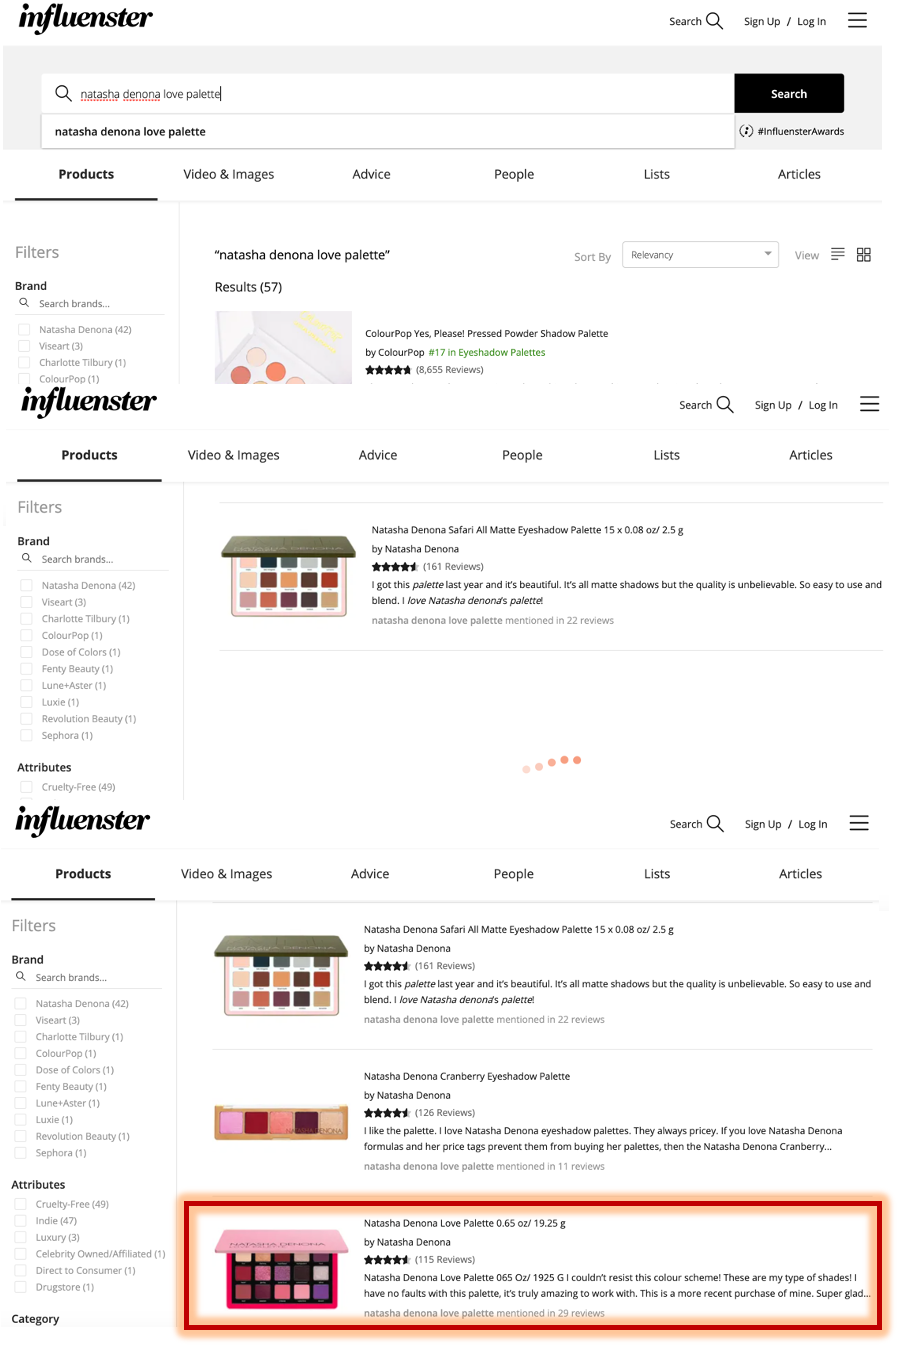

In [1]:
from IPython.display import Image
Image('/Users/myhellebs/Pictures/influenster.png')

In [2]:
import pandas as pd
import re
import numpy as np
import urllib
import requests
import json
import os
import re
import pandas as pd
import numpy as np
from tqdm import tqdm
import time
import random
from datetime import datetime
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver

product_search_list = pd.read_excel('product_list_200616.xlsx')
product_search_list = product_list[['product_code','brand', 'product_name']]
product_search_list = product_list.drop_duplicates()

# 브랜드 + 상품명을 같이 붙여서 검색하기 위해 검색어 칼럼을 생성
product_search_list['search_query'] = product_search_list[['brand', 'product_name']].apply(lambda x: ' '.join(x), axis=1)
result = []
driver = webdriver.Chrome(ChromeDriverManager().install())

for idx, product_list in tqdm(product_search_list[892:893].iterrows(), desc="돌리는중"):
    
    
    code = product_list['product_code']
    brand = product_list['brand']
    product = product_list['product_name']
    search_query = product_list['search_query']
    
    
    url = 'https://www.influenster.com/reviews/search?q=' + search_query
    driver.get(url)
    time.sleep(10)

    SCROLL_PAUSE_TIME = 2

    last_height = driver.execute_script("return document.body.scrollHeight")         

    while True:
                                                     
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        time.sleep(SCROLL_PAUSE_TIME)                                                
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight-50);")  
        time.sleep(SCROLL_PAUSE_TIME)
        
        new_height = driver.execute_script("return document.body.scrollHeight")

        # 이전의 창과 현재의 창 크기가 같으면 while문 멈춤(= 스크롤 완료)
        if new_height == last_height:                                                
            break

        last_height = new_height

    
    time.sleep(3)
        
        
    try :
        
        html = driver.page_source
        soup = BeautifulSoup(html,"html.parser")
        review_body = soup.find('div','main-scroll-wrapper')
        review_list = review_body.find_all('p','product-title')
        review_counts = review_body.find_all('span','stars-stats')
        #review_imges = review_body.find_all('div','product-image col-flex')
        review_url = review_body.find_all('a','product-item flex-box-wrapper')
        #review_url[0]['href']
        review_brands = review_body.find_all('p','producer-brand')
        

        for each_review, review_count, each_url, review_brand in zip(review_list,review_counts,review_url,review_brands) :
            review_product = each_review.text
            review_brand = review_brand.text.replace('by','').strip()
            count = review_count.text
            count = re.sub('[^0-9]','',count)
            each_url = 'https://www.influenster.com' + each_url['href']
        
            data = {'product_code':code,'brand':brand,'product_name':product,'search_query':search_query,'review_brand':review_brand,'review_product_name':review_product,'review_url':each_url,'review_count':count}
            result.append(data)
    
    
    except :
        
        pass
    
        
review_list_result = pd.DataFrame(result,columns=['product_code','brand','product_name','search_query','review_brand','review_product_name','review_url','review_count'])



Looking for [chromedriver 83.0.4103.39 mac64] driver in cache 
File found in cache by path [/Users/myhellebs/.wdm/drivers/chromedriver/83.0.4103.39/mac64/chromedriver]


돌리는중: 1it [00:22, 22.71s/it]


In [5]:
review_list_result.drop('product_code',axis=1)

,brand,product_name,search_query,review_brand,review_product_name,review_url,review_count
0,Velour Lashes,Luminous Lash Collection,Velour Lashes Luminous Lash Collection,Sephora,SEPHORA COLLECTION Tinsel Time False Lash Demure,https://www.influenster.com/reviews/sephora-co...,2
1,Velour Lashes,Luminous Lash Collection,Velour Lashes Luminous Lash Collection,Velour,Velour Lashes Luminous Lash Collection Midnigh...,https://www.influenster.com/reviews/velour-las...,1
2,Velour Lashes,Luminous Lash Collection,Velour Lashes Luminous Lash Collection,Velour,Velour Lashes Luminous Lash Collection Champag...,https://www.influenster.com/reviews/velour-las...,1
3,Velour Lashes,Luminous Lash Collection,Velour Lashes Luminous Lash Collection,Velour,Velour Lashes Luminous Lash Collection Sapphir...,https://www.influenster.com/reviews/velour-las...,0
4,Velour Lashes,Luminous Lash Collection,Velour Lashes Luminous Lash Collection,Velour,Velour Lashes Luminous Lash Collection Platinu...,https://www.influenster.com/reviews/velour-las...,0
5,Velour Lashes,Luminous Lash Collection,Velour Lashes Luminous Lash Collection,Velour,Velour Lashes Luminous Lash Collection Platinu...,https://www.influenster.com/reviews/velour-las...,0
6,Velour Lashes,Luminous Lash Collection,Velour Lashes Luminous Lash Collection,Velour,Velour Lashes Luminous Lash Collection Midnigh...,https://www.influenster.com/reviews/velour-las...,0
7,Velour Lashes,Luminous Lash Collection,Velour Lashes Luminous Lash Collection,Velour,Velour Lashes Luminous Lash Collection Champag...,https://www.influenster.com/reviews/velour-las...,0
8,Velour Lashes,Luminous Lash Collection,Velour Lashes Luminous Lash Collection,Velour,Velour Lashes Luminous Lash Collection Sapphir...,https://www.influenster.com/reviews/velour-las...,0
9,Velour Lashes,Luminous Lash Collection,Velour Lashes Luminous Lash Collection,Velour,Velour It's Sho Fluffy! Lashes,https://www.influenster.com/reviews/velour-its...,5


# < 위에서 수집한 리스트에서 크롤링할 상품 선택하기 >

1. 브랜드가 일치하지 않는 것은 제외 : product_name = review_product_name 일치 상품 크롤링

2. product_name이 완벽하게 들어있는 것은 같은 상품이라고 간주함 (같은 상품인데 옵션이 다른 경우라서)
예를 들어 컬러, kit(여행용 등), 한정판 시즌 제품

3. 2번을 구현할 수치 함수 작성

In [6]:
def text_score(x,y):
    x = x.split(" ")
    y = y.split(" ")
    score = 0
    
    for i in x:
        if i in y:
            score = score + 1
            
        else :
            pass
        
        total_score = score / len(x) * 100
    
    return total_score  

In [7]:
review_list_result['match_degree'] = review_list_result.apply(lambda x : text_score(x['product_name'],x['review_product_name']), axis =1)

In [8]:
review_list_result[review_list_result['brand'] == review_list_result['review_brand']]
review_list_result[review_list_result['match_degree'] == 100]

,product_code,brand,product_name,search_query,review_brand,review_product_name,review_url,review_count,match_degree
1,P425704,Velour Lashes,Luminous Lash Collection,Velour Lashes Luminous Lash Collection,Velour,Velour Lashes Luminous Lash Collection Midnigh...,https://www.influenster.com/reviews/velour-las...,1,100.0
2,P425704,Velour Lashes,Luminous Lash Collection,Velour Lashes Luminous Lash Collection,Velour,Velour Lashes Luminous Lash Collection Champag...,https://www.influenster.com/reviews/velour-las...,1,100.0
3,P425704,Velour Lashes,Luminous Lash Collection,Velour Lashes Luminous Lash Collection,Velour,Velour Lashes Luminous Lash Collection Sapphir...,https://www.influenster.com/reviews/velour-las...,0,100.0
4,P425704,Velour Lashes,Luminous Lash Collection,Velour Lashes Luminous Lash Collection,Velour,Velour Lashes Luminous Lash Collection Platinu...,https://www.influenster.com/reviews/velour-las...,0,100.0
5,P425704,Velour Lashes,Luminous Lash Collection,Velour Lashes Luminous Lash Collection,Velour,Velour Lashes Luminous Lash Collection Platinu...,https://www.influenster.com/reviews/velour-las...,0,100.0
6,P425704,Velour Lashes,Luminous Lash Collection,Velour Lashes Luminous Lash Collection,Velour,Velour Lashes Luminous Lash Collection Midnigh...,https://www.influenster.com/reviews/velour-las...,0,100.0
7,P425704,Velour Lashes,Luminous Lash Collection,Velour Lashes Luminous Lash Collection,Velour,Velour Lashes Luminous Lash Collection Champag...,https://www.influenster.com/reviews/velour-las...,0,100.0
8,P425704,Velour Lashes,Luminous Lash Collection,Velour Lashes Luminous Lash Collection,Velour,Velour Lashes Luminous Lash Collection Sapphir...,https://www.influenster.com/reviews/velour-las...,0,100.0


위의 과정을 거쳐서 리뷰를 크롤링할 상품 리스트들을 만들었음


-------------------------------------------------------------------------------------------------

### - 웹페이지 화면의 크기가 모두 다르고 특정 지점까지만 스크롤 해야할 때 
### 주의 : 해당 지점을 맨 위로 위치하게 스크롤 됨
1. find_element_by_class_name('name 이름')로 element 지점 찾아주기 !

이때 class가 여러개인 경우에는 find_elements_~~ 해줄 것 리스트로 반환된다


2. class name에 공백이 있을 경우에는?

find_element_by_css_sector 사용하는데 class의 태그명을 반드시 붙이고, 공백은 모두 point(='.')으로 대체한다

예시)😩 < div class="layoutComponents__Row-l2otzz-2 hXWPE layoutComponents__Block-l2otzz-0 ixyxcj" > 

😜find_elements_by_css_selector('div.layoutComponents__Row-l2otzz-2.deFnOI.layoutComponents__Block-l2otzz-0.dqxIqt')

In [9]:
import pandas as pd
import re
import numpy as np
import urllib
import requests
import json
import os
import re
import pandas as pd
import numpy as np
from tqdm import tqdm
import time
import random
from datetime import datetime
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains

options = webdriver.ChromeOptions()
options.add_argument('user-agent = Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/68.0.3440.106 Safari/537.36')
driver = webdriver.Chrome(ChromeDriverManager().install(), options = options)

influenster = pd.read_excel('/Users/myhellebs/Downloads/influenster_crawl_list.xlsx')
data_list = []


for idx,influ_list in tqdm(influenster[11:12].iterrows(), desc="돌리는중"):                    
    brand = influ_list['brand']
    product_code = influ_list['product_code']
    product_name = influ_list['product_name']
    review_url = influ_list['review_url']
    #review_count = influ_list['review_count']
    driver.get(review_url)
    time.sleep(15)
    html = driver.page_source
    soup = BeautifulSoup(html,"html.parser")
    try : 
        first_page_num = len(soup.find_all('div',class_='item wrappers__Wrapper-sc-1mex847-0 fNRjgH'))
        
        # 클릭 위치가 여러개여서 경우의 수에 따라 조건문을 만듦
        if soup.find('div',class_='orange-background'):
            click_location = -1
        else:
            if first_page_num < 20 :
                click_location = -1
            elif first_page_num == 20 :
                if len(driver.find_elements_by_class_name('next')) >= 4 :
                    click_location = -2
                else :
                    click_location = 1
        try :
            total_review_page = soup.find_all('ul',class_='pagination-page-list')[0].find_all('li')[-2].text
            total_review_page = int(total_review_page)
        except : 
            total_review_page = 1
        for i in range(total_review_page):
            html = driver.page_source
            soup = BeautifulSoup(html,"html.parser")
            review_body = soup.find('div',class_='search__ReviewWrapper-sc-1ylxfoz-1 hwQBqj layoutComponents__Block-l2otzz-0 ixyxcj')
            reviews = review_body.find_all('div',class_= 'item wrappers__Wrapper-sc-1mex847-0 fNRjgH')
            for r in reviews :
                review = r.find('div',class_='review-text layoutComponents__Text-l2otzz-1 kgitTG layoutComponents__Block-l2otzz-0 ixyxcj').text
                data = {'product_code':product_code,'brand':brand,'product_name':product_name,'review':review,'review_url': review_url}
                data_list.append(data)
            try :
                element = driver.find_elements_by_css_selector('div.layoutComponents__Row-l2otzz-2.deFnOI.layoutComponents__Block-l2otzz-0.dqxIqt')
                element = element[-1]
                driver.execute_script("arguments[0].scrollIntoView();", element)
                time.sleep(1)
                driver.find_elements_by_class_name('next')[click_location].click()   
                time.sleep(12)
            except :
                if len(driver.find_elements_by_class_name('next')) >= 4 :
                    click_location = -2 
                else :
                    click_location = 1 # 질문이 딱 10개만 있는 경우           

    except:                      
        pass
    
    print(product_name)


influenster_crawl_result = pd.DataFrame(data_list,columns = ['product_code','brand','product_name','review','review_url'] )#.drop_duplicates()  
# url_preserve = pd.ExcelWriter('/Users/myhellebs/Downloads/influenster_crawl_result_0625_4_.xlsx', options={'strings_to_urls': False})
# influenster_crawl_result.to_excel(url_preserve)
# url_preserve.save()


Looking for [chromedriver 83.0.4103.39 mac64] driver in cache 
File found in cache by path [/Users/myhellebs/.wdm/drivers/chromedriver/83.0.4103.39/mac64/chromedriver]


돌리는중: 0it [00:00, ?it/s]

Snap Shadows Mix & Match Eyeshadow Palette


돌리는중: 1it [01:00, 60.71s/it]


In [10]:
influenster_crawl_result

,brand,product_name,review,review_url
0,FENTY BEAUTY by Rihanna,Snap Shadows Mix & Match Eyeshadow Palette,I was wearing the peach one and the rose one. ...,https://www.influenster.com/reviews/fenty-beau...
1,FENTY BEAUTY by Rihanna,Snap Shadows Mix & Match Eyeshadow Palette,I think this product is filling a need within ...,https://www.influenster.com/reviews/fenty-beau...
2,FENTY BEAUTY by Rihanna,Snap Shadows Mix & Match Eyeshadow Palette,I bought the Fenty Snap Shadow in the color Pe...,https://www.influenster.com/reviews/fenty-beau...
3,FENTY BEAUTY by Rihanna,Snap Shadows Mix & Match Eyeshadow Palette,"traditional and basic eyeshadows, I love to ca...",https://www.influenster.com/reviews/fenty-beau...
4,FENTY BEAUTY by Rihanna,Snap Shadows Mix & Match Eyeshadow Palette,"I wasn’t a fan at first, not as pigmented and ...",https://www.influenster.com/reviews/fenty-beau...
5,FENTY BEAUTY by Rihanna,Snap Shadows Mix & Match Eyeshadow Palette,love these shadows. very pigmented and blend o...,https://www.influenster.com/reviews/fenty-beau...
6,FENTY BEAUTY by Rihanna,Snap Shadows Mix & Match Eyeshadow Palette,The snap collects were really good. I believe ...,https://www.influenster.com/reviews/fenty-beau...
7,FENTY BEAUTY by Rihanna,Snap Shadows Mix & Match Eyeshadow Palette,Pigments are buttery and flawlessly buildable ...,https://www.influenster.com/reviews/fenty-beau...
8,FENTY BEAUTY by Rihanna,Snap Shadows Mix & Match Eyeshadow Palette,Wow estan divinas estas sombras la pigmentació...,https://www.influenster.com/reviews/fenty-beau...
9,FENTY BEAUTY by Rihanna,Snap Shadows Mix & Match Eyeshadow Palette,This palette is one of my favorites. It’s very...,https://www.influenster.com/reviews/fenty-beau...
